In [10]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
from IPython.display import clear_output

dim = 100
p = 0.9

In [2]:
# obtener coordenadas en una matriz dim x dim a partir de un índice
def getCoordsFromIndex(index):
    x = int(index/dim)
    y = index - x*dim
    return x, y

# proceso inverso
def getIndexFromCoords(x, y):
    index = dim*x + y
    return index

In [3]:
Vecindario = [[-1, 1], [0, 1], [1, 1],
              [-1, 0],         [1, 0], 
              [-1,-1], [0,-1], [1,-1]]

In [4]:
def vecinosVivos(space_arr, vecindario):
    vv = 0
    for v in vecindario:
        if space_arr[v[1], v[0]]:
            vv += 1

    return vv

In [5]:
# a partir de un movimiento se retorna la posición correcta
# útil cuando posición actual está en un borde
def vecinoBorde(posActual, vecino, xMax, yMax):
    
    # coordenadas finales
    xCoordVecino = posActual[0] + vecino[0]
    yCoordVecino = posActual[1] + vecino[1]

    # en X
    if xCoordVecino < xMax and xCoordVecino >= 0:
        xAct = xCoordVecino
    elif xCoordVecino < 0:
        xAct = xMax - 1
    else:
        xAct = 0

    # en Y
    if yCoordVecino < yMax and yCoordVecino >= 0:
        yAct = yCoordVecino
    elif yCoordVecino < 0:
        yAct = yMax - 1
    else:
        yAct = 0

    return xAct, yAct

In [6]:

def vecindarioActual(pos):
    VA = []

    for v in Vecindario:
        vb = vecinoBorde(pos, v, dim, dim)
        # print("vecinos x:", vb)
        VA.append(vb)

    return VA

In [7]:
# aplicar reglas
def rules(space_arr, state_arr):

    act_cells = set(state_arr)

    for cell in state_arr:
        x, y = getCoordsFromIndex(cell)
        vec = vecindarioActual([x, y])
        for v in vec:
            act_cells.add(getIndexFromCoords(v[0], v[1])) # v son coordenadas
        
    # se verifican todas las celulas vivas y sus vecinos
    act_cells_list = list(act_cells)
    new_cells = []
    for cell in act_cells_list:
        
        x, y = getCoordsFromIndex(cell)
        
        # obtener vecinos en casos borde
        vec = vecindarioActual([x, y])
        nVivos = vecinosVivos(space_arr, vec)
        
        alive = space_arr[y,x]

        if not alive and nVivos == 3:
            space_arr[y, x] = True
            new_cells.append(cell)

        elif alive:
            if nVivos < 2 or nVivos > 3:
                space_arr[y, x] = False
            else:
                new_cells.append(cell)

    return space_arr, np.array(new_cells)

In [8]:
def initMap():

    S = np.random.rand(dim, dim) > p
    Y, X = np.where(S) #[Y, X]
    
    E = getIndexFromCoords(X, Y)

    return S, E

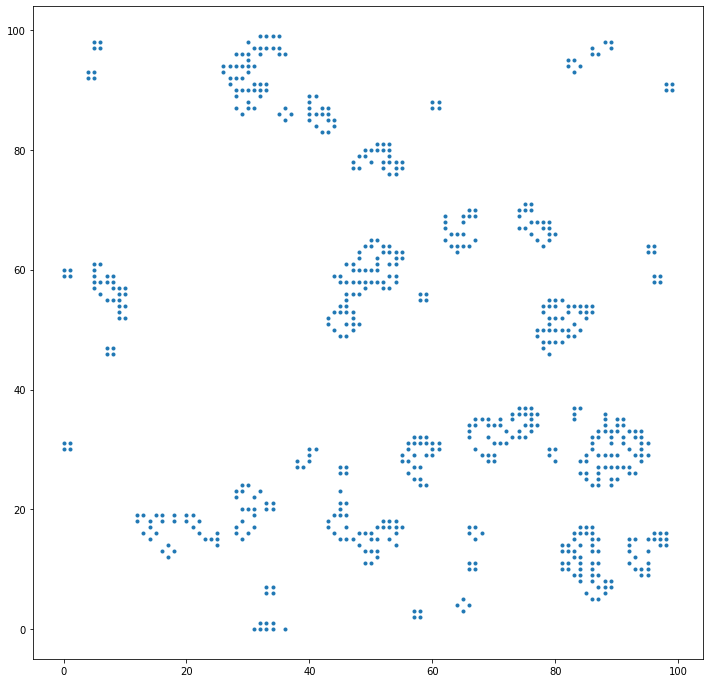

In [11]:
# 10.000 x 10.000
# 2 grillas -> espacial y estados

# N: live neighbors

# N < 2 : 1 -> 0
# N > 3 : 1 -> 0
# 2 - 3 N : 1 -> 1

# N == 3 : 0 -> 1


np.random.seed(10)

S, E = initMap()

T = 10
t = 0
while t < T:
        
    Y, X = np.where(S)

    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(X,Y, ".")

    S, E = rules(S, E)

    plt.show()
    plt.pause(0.01)
    clear_output(wait=True)
    t += 1